# Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we train DDPG with OpenAI Gym's Pendulum-v0 environment.

### 1. Import the Necessary Packages

In [1]:
!git clone https://github.com/UnnamedMoose/UnderwaterVehicleReinforcementLearning.git

Cloning into 'UnderwaterVehicleReinforcementLearning'...
remote: Enumerating objects: 374, done.
remote: Total 374 (delta 0), reused 0 (delta 0), pack-reused 374
Receiving objects: 100% (374/374), 239.13 MiB | 12.73 MiB/s, done.
Resolving deltas: 100% (175/175), done.
Updating files: 100% (109/109), done.


In [2]:
import sys
sys.path.insert(0, '/content/UnderwaterVehicleReinforcementLearning/')

In [1]:
import gym
import random
import torch
import numpy as np
import verySimpleAUV as auv
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import resources

from ddpg_agent import Agent

### 2. Instantiate the Environment and Agent

In [2]:
env_kwargs = {
        # Set to zero to disable the flow - much faster training.
        "currentVelScale": 1.,
        "currentTurbScale": 2.,
        # Use noise in coefficients for training only.
        "noiseMagActuation": 0.1,
        "noiseMagCoeffs": 0.1,
    }
env = auv.AuvEnv(**env_kwargs)
agent = Agent(state_size=9, action_size=3, random_seed=2)

### 3. Train the Agent with DDPG

Episode 100	Average Score: 94.41
Episode 200	Average Score: 100.32
Episode 300	Average Score: 97.31
Episode 400	Average Score: 87.12


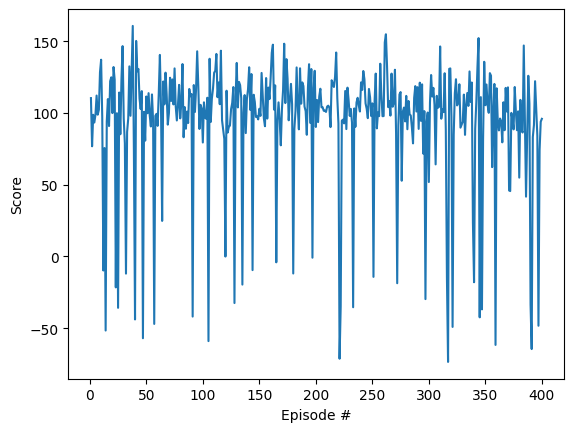

In [6]:
def ddpg(n_episodes=400, max_t=100, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        #print("state: ", state )
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        #print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In [7]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

state = env.reset()
for t in range(200):
    action = agent.act(state, add_noise=False)
    #env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 

env.close()

5. Showing the results


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/content/resources.py:377: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


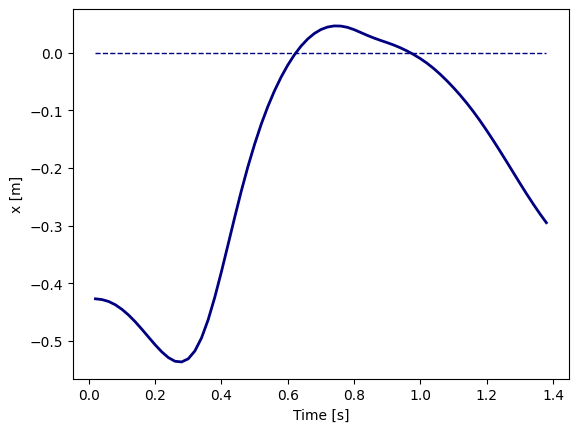

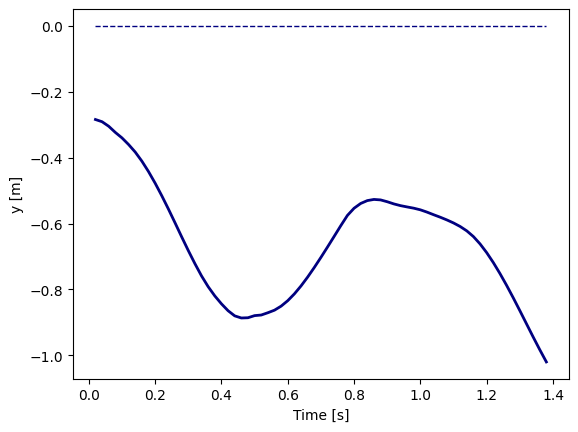

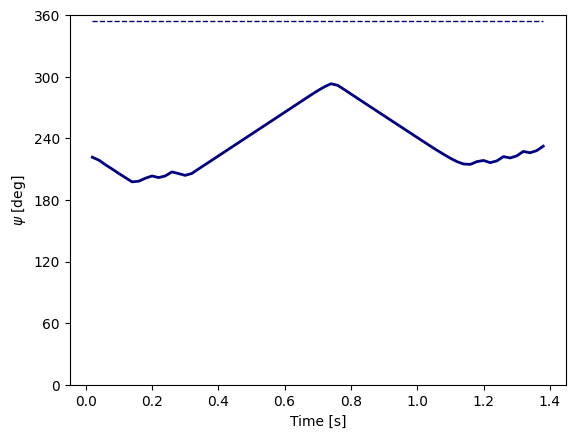

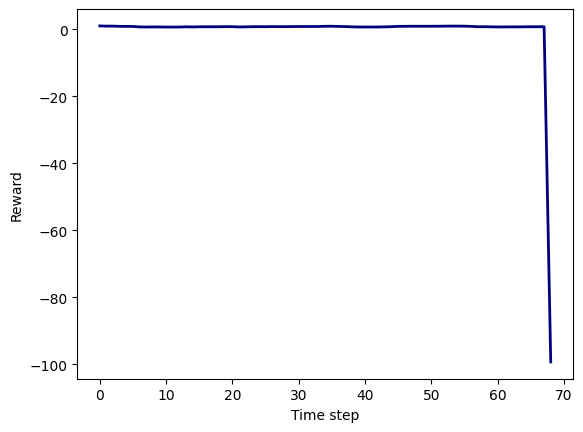

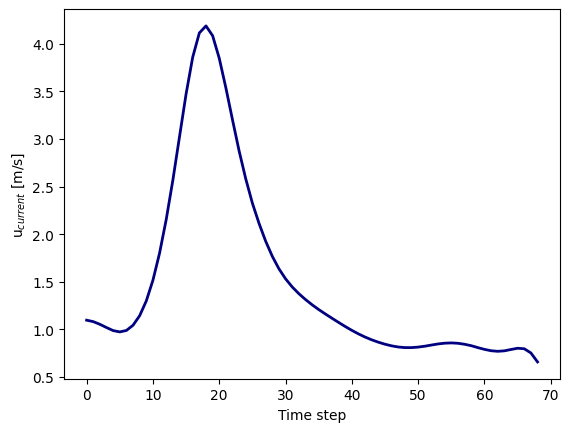

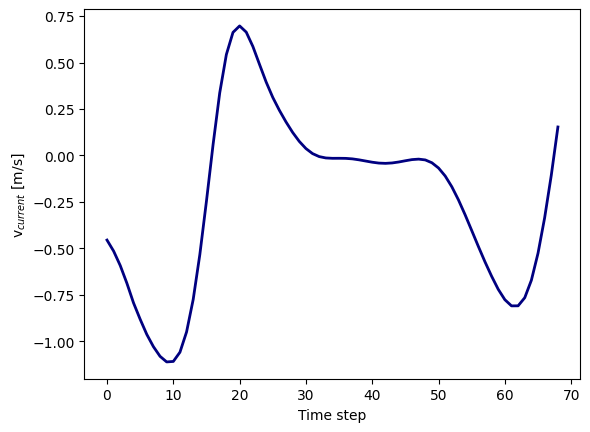

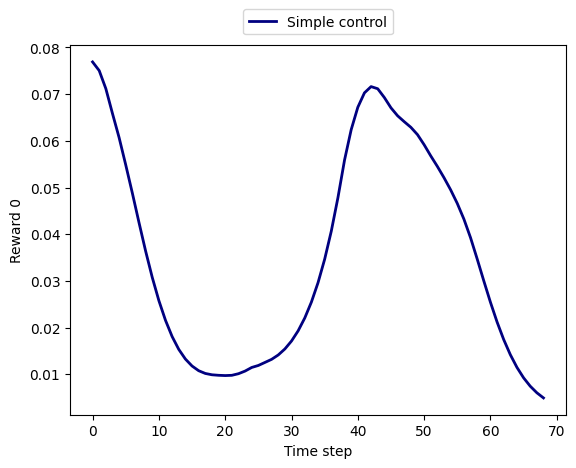

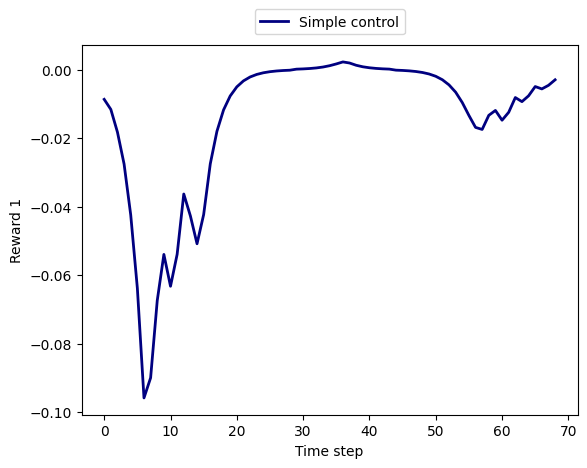

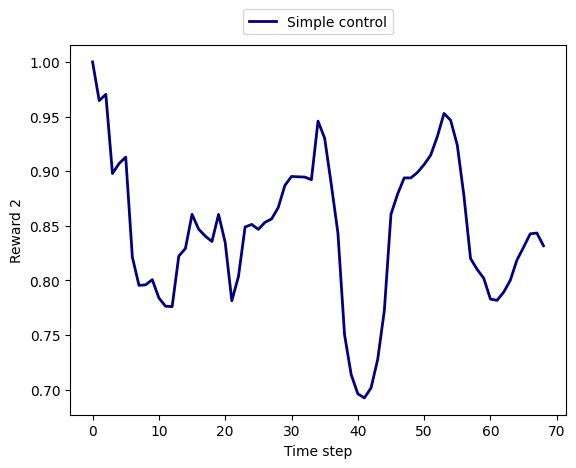

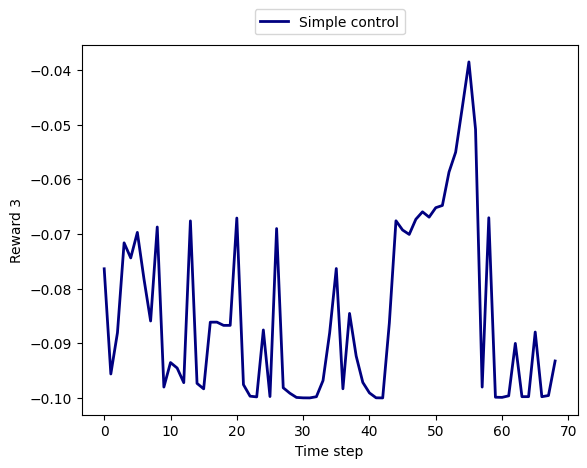

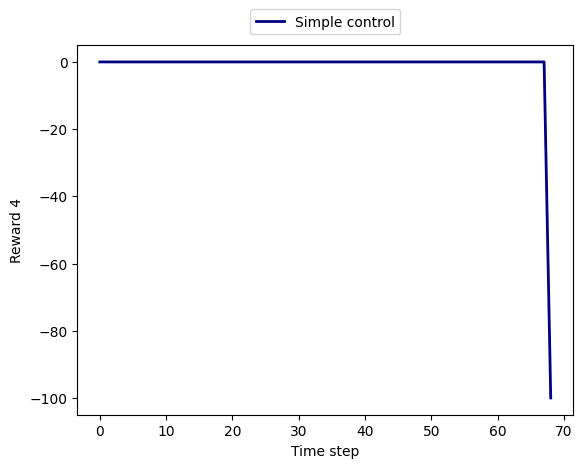

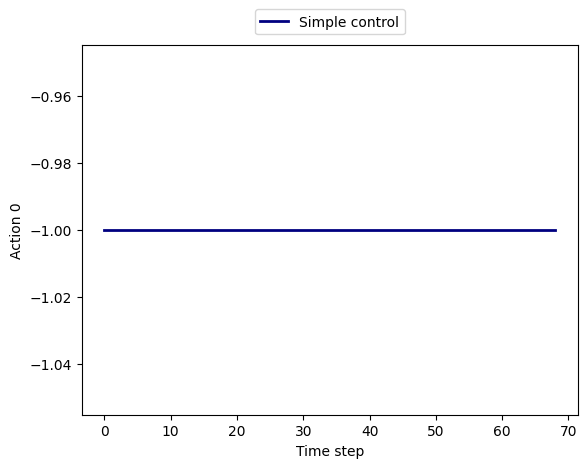

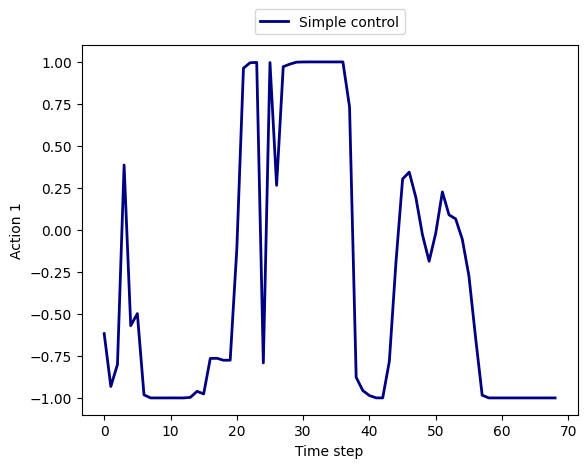

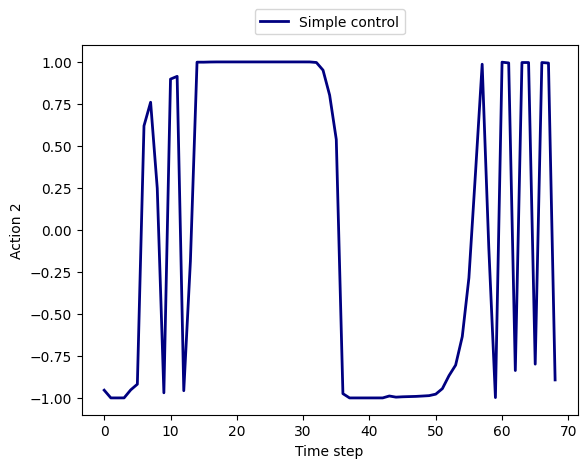

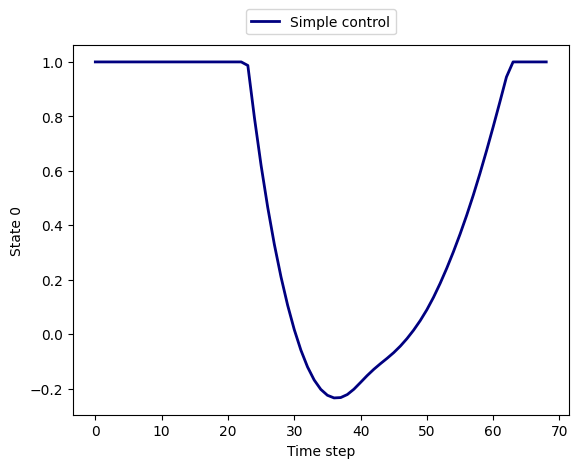

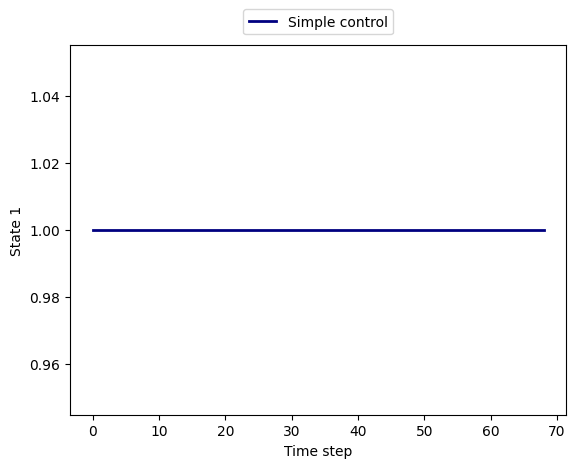

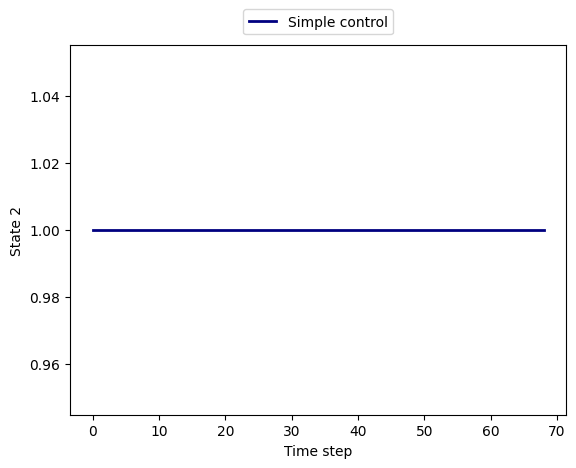

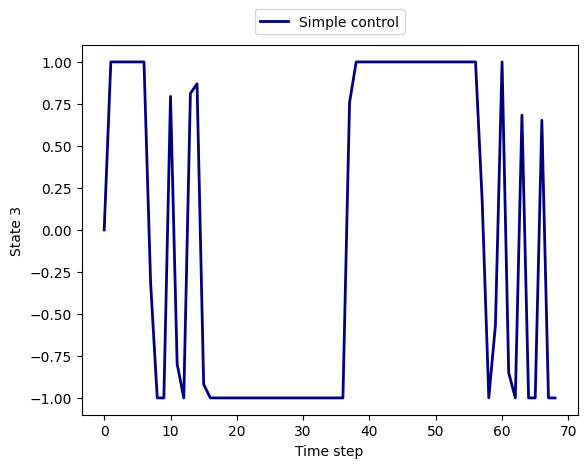

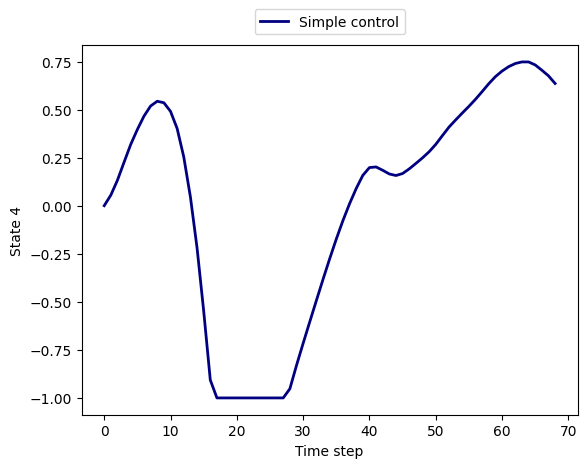

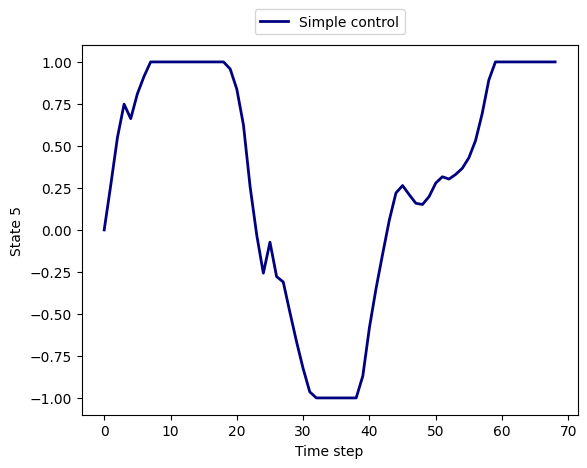

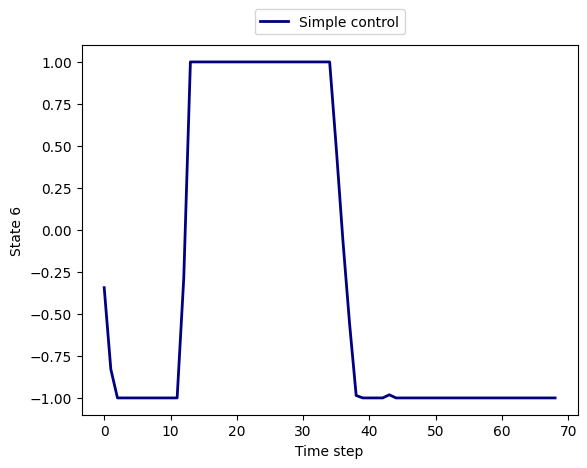

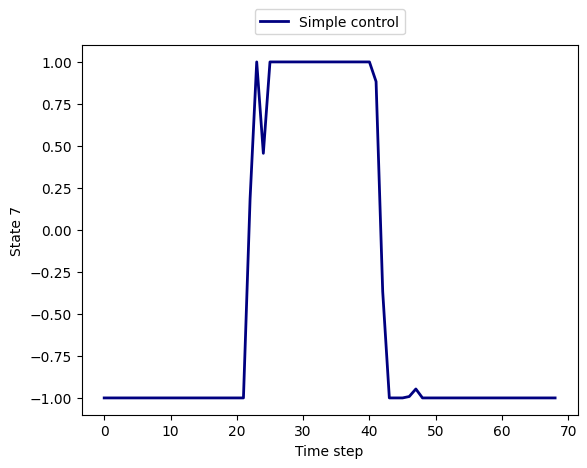

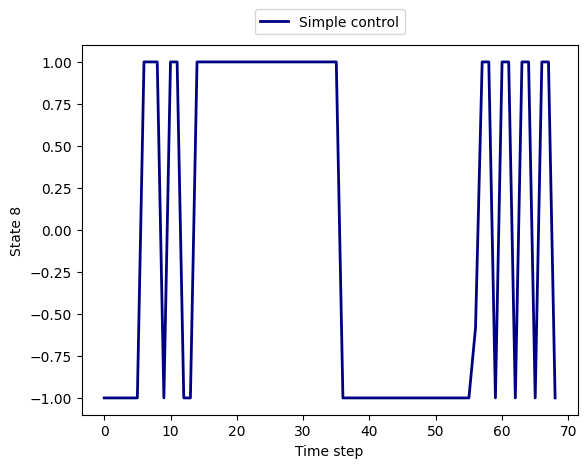

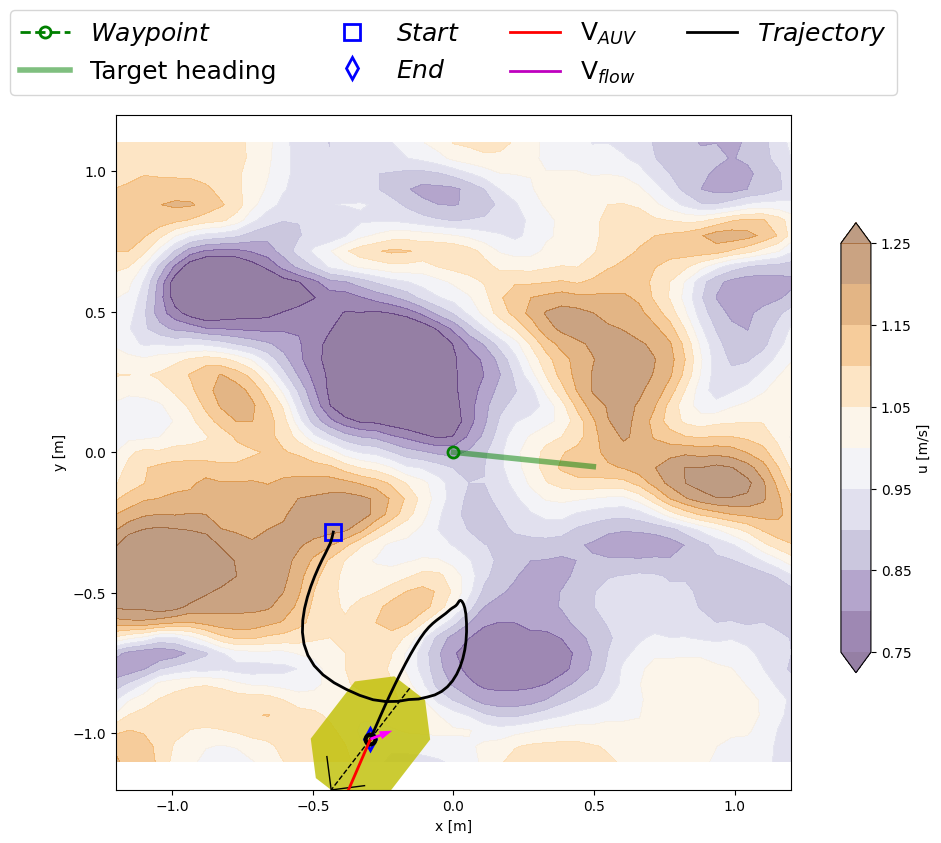

In [8]:
import resources

# Plot detailed time histories of state, action, etc.
resources.plotDetail(env, labels=["Simple control"])

# Plot an animated replay of the time history.
resources.animateEpisode(env, "test")

### 6. Explore

In this exercise, we have provided a sample DDPG agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster than this benchmark implementation.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task!
- You may also like to implement prioritized experience replay, to see if it expedites learning.  
- The current implementation adds Ornsetein-Uhlenbeck noise to the action space.  However, it has [been shown](https://openai.com/research/better-exploration-with-parameter-noise/) that adding noise to the parameters of the neural network policy can improve performance.  Make this change to the code, to verify it for yourself!
 